So today what we are trying to do is to make an MCMC sampler that work for a generic prior distribution for a generic proposal distribution in a non define number of dimensions!
Should be difficult in some way, let's see what are we able to do.

Let's start by encoding the distribution that we want to analize:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
sig = 2.
mu = 4.
likelihood = (lambda x: np.exp(-(((x-mu)/sig)**2)/2.)/np.sqrt(2.*np.pi*(sig**2)))

We can write now the sampler, as a proposal distribution we will use `random.normal`

In [8]:
sigP = 1.
muP = 18.
Nsteps = 500

sample =[]

for i in range(Nsteps):
    x = np.random.normal(muP, sigP, 1)[0]
    a = likelihood(x)/likelihood(muP)
    trial = np.random.uniform(0,1,1)
    if trial < a:
        muP = x
    sample.append(muP)
    
sample
df = pd.DataFrame(sample)
df

,0
0,16.718278
1,16.928585
2,16.928585
3,15.565469
4,15.271719
...,...
495,8.186155
496,8.782841
497,8.782841
498,8.782841


Let's plot the sample obtained

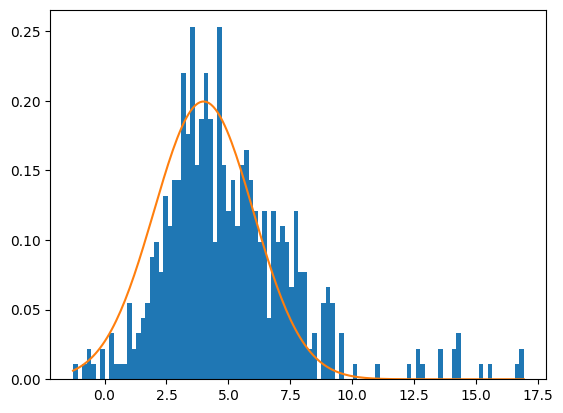

In [9]:
n_bins = 100

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df[0], density=True, bins=n_bins)


xgauss = np.linspace(min(df[0]), max(df[0]), 200)
ygauss = likelihood(xgauss)

ax.plot(xgauss,ygauss)

# set the limits
# ax.set_xlim([-4, 4])
# ax.set_ylim([0, 1])
plt.show()